In [10]:
!pip install pycocotools --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 477.3/477.3 kB 4.0 MB/s eta 0:00:0000:0100:01


In [16]:
# Download Coco Dataset
!mkdir -p coco/images
!wget -c http://images.cocodataset.org/zips/val2017.zip -P coco/images
!wget -c http://images.cocodataset.org/zips/train2017.zip -P coco/images

--2025-08-02 11:17:24--  http://images.cocodataset.org/zips/val2017.zip
16.15.177.240, 3.5.11.192, 52.216.185.51, ...dataset.org)... 
connected. to images.cocodataset.org (images.cocodataset.org)|16.15.177.240|:80... 
200 OKequest sent, awaiting response... 
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco/images/val2017.zip’

^Cl2017.zip          93%[=================>  ] 729.86M  5.62MB/s    eta 8s     
--2025-08-02 11:19:20--  http://images.cocodataset.org/zips/test2017.zip
52.216.147.156, 52.217.117.81, 3.5.27.175, ...ataset.org)... 
connected. to images.cocodataset.org (images.cocodataset.org)|52.216.147.156|:80... 
200 OKequest sent, awaiting response... 
Length: 6646970404 (6.2G) [application/zip]
Saving to: ‘coco/images/test2017.zip’

^Cst2017.zip          0%[                    ]  12.24M  4.22MB/s               


In [3]:
!unzip -q coco/images/val2017.zip -d coco/images
!unzip -q coco/images/train2017.zip -d coco/images

In [4]:
!rm coco/images/val2017.zip
!rm coco/images/test2017.zip

In [2]:
!wget -c http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P coco

--2025-08-02 09:50:36--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
3.5.29.78, 52.217.197.233, 52.216.34.49, ...odataset.org)... 
connected. to images.cocodataset.org (images.cocodataset.org)|3.5.29.78|:80... 
200 OKequest sent, awaiting response... 
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco/annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  12.6MB/s    in 35s     

2025-08-02 09:51:12 (6.82 MB/s) - ‘coco/annotations_trainval2017.zip’ saved [252907541/252907541]



In [6]:
!unzip -q coco/annotations_trainval2017.zip -d coco

In [12]:
from torchvision.datasets import CocoCaptions
import torchvision.transforms as transforms


image_path = "coco/images/val2017"
annotations = "coco/annotations/captions_val2017.json"

dataset = CocoCaptions(
    root=image_path,
    annFile=annotations,
    transform=transforms.ToTensor()
)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


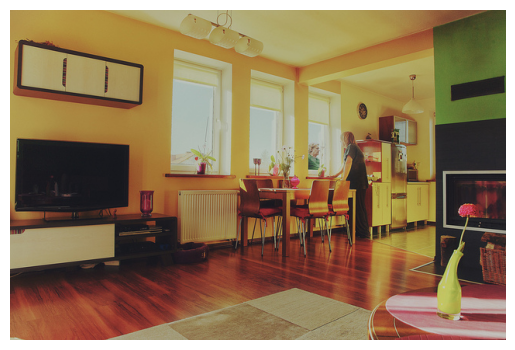

In [13]:
import matplotlib.pyplot as plt
from PIL import Image


img, captions = dataset[0]

img_show = transforms.ToPILImage()(img)
plt.imshow(img_show)
plt.axis('off')
plt.show()

In [15]:
print("Captions:")
for caption in captions:
    print("-", caption)

Captions:
- A woman stands in the dining area at the table.
- A room with chairs, a table, and a woman in it.
- A woman standing in a kitchen by a window
- A person standing at a table in a room.
- A living area with a television and a table
